### Lab 5 Overview
#### First Half
- Machine Learning
- Clustering with kmeans
- Regression Trees (continuous predictions with tree models)

#### Second Half
- *Questions?*

--------

### Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use(['dark_background'])


from sklearn.cluster import KMeans

df = pd.read_feather("../Data/Lab1/sample.feather").dropna().drop('index', axis=1)

In [2]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,PickupCell,DropoffCell,pickupX,pickupY,dropoffX,dropoffY
98190,2,4/12/15 22:55,4/12/15 23:03,1,0.75,-73.994370,40.746239,1,N,-73.980774,...,0.00,0.0,0.3,7.80,25:69,27:68,-8.237016e+06,4.974984e+06,-8.235502e+06,4.974382e+06
98191,1,4/12/15 22:55,4/12/15 23:08,1,2.40,-73.968346,40.759735,1,N,-73.969879,...,0.00,0.0,0.3,12.30,27:64,24:60,-8.234119e+06,4.976967e+06,-8.234289e+06,4.980647e+06
98192,1,4/12/15 22:55,4/12/15 23:01,1,0.80,-73.993484,40.742168,1,N,-73.984390,...,1.45,0.0,0.3,8.75,25:69,26:67,-8.236917e+06,4.974386e+06,-8.235905e+06,4.975537e+06
98193,2,4/12/15 22:55,4/12/15 23:17,1,4.73,-73.984993,40.747929,1,N,-73.981552,...,3.96,0.0,0.3,23.76,26:68,33:76,-8.235972e+06,4.975232e+06,-8.235589e+06,4.966693e+06
98194,2,4/12/15 22:55,4/12/15 22:59,2,0.80,-73.975731,40.751968,1,N,-73.981247,...,1.16,0.0,0.3,6.96,27:66,27:68,-8.234941e+06,4.975826e+06,-8.235555e+06,4.974377e+06


In [17]:
# create a datframe of just coordinates
LAT = ['pickup_latitude','dropoff_latitude']
LON = ['pickup_longitude','dropoff_longitude']

df_coords = pd.DataFrame()
df_coords['lat'] = df[LAT[0]].values + df[LAT[1]].values
df_coords['lon'] = df[LON[0]].values + df[LON[1]].values

In [18]:
df_coords

,lat,lon
0,81.528469,-147.946251
1,81.508377,-147.965965
2,81.556171,-147.943398
3,81.489151,-147.991600
4,81.423859,-147.964516
...,...,...
98190,81.488384,-147.975143
98191,81.544502,-147.938225
98192,81.492176,-147.977875
98193,81.437717,-147.966545


In [19]:
%%time
# run kmeans and output labels
kmeans = KMeans(n_clusters=10).fit(df_coords)
df_coords['cluster'] = kmeans.labels_

CPU times: user 14.8 s, sys: 1.52 s, total: 16.3 s
Wall time: 2.92 s


In [20]:
df_coords

,lat,lon,cluster
0,81.528469,-147.946251,1
1,81.508377,-147.965965,1
2,81.556171,-147.943398,7
3,81.489151,-147.991600,9
4,81.423859,-147.964516,6
...,...,...,...
98190,81.488384,-147.975143,9
98191,81.544502,-147.938225,7
98192,81.492176,-147.977875,9
98193,81.437717,-147.966545,3


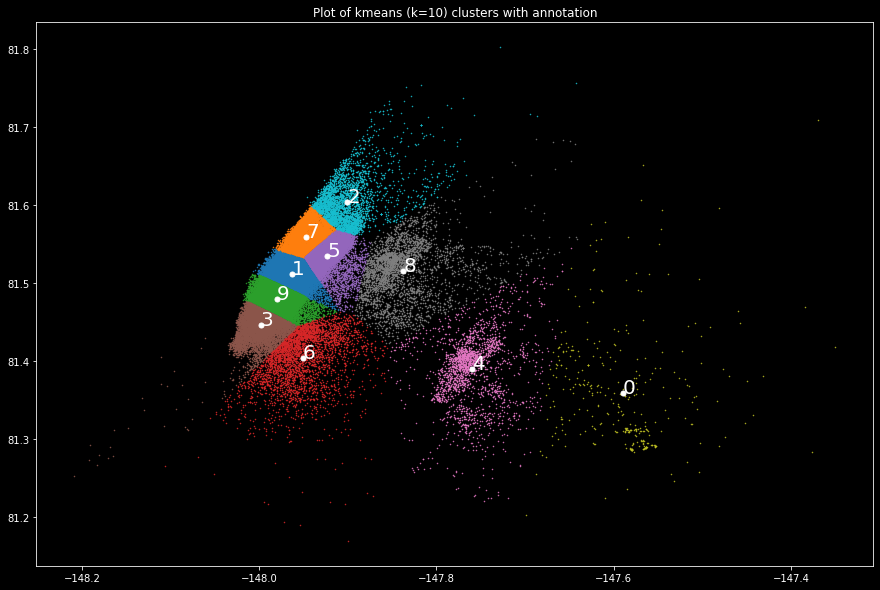

In [26]:
# sns.scatterplot(data=df_coords, x='lon',y='lat', size=10, hue='cluster')

fig, ax = plt.subplots(figsize = (15,10))

for cluster, c_color in zip(df_coords['cluster'].unique(), mcolors.TABLEAU_COLORS):
    cluster_coords = df_coords.loc[df_coords['cluster'] == cluster, ['lon','lat']]
    ax.plot(cluster_coords['lon'], cluster_coords['lat'], '.', markersize=1, color=c_color)
    
    center = kmeans.cluster_centers_[cluster]
    ax.plot(center[1], center[0], 'o', color='white', markersize=5)
    ax.annotate(cluster, (center[1], center[0]), color = 'white', fontsize = 20)
    
plt.title("Plot of kmeans (k=10) clusters with annotation")
plt.show()

### Machine Learning
https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf
- Generalize the model (train dataset will almost never be the same as "test" dataset, let alone real world test data)
    - Avoid overfitting
    - Remember the bias that can occur with a normal train-test split (80% train vs 20% test is not representitive and can change depending on the split)
    - Cross validation
- There is never enough data
    - Models will always make certain assumptions 
    - Even the best model may be no better than a DummyClassifier (random predictions). Think about real world problems with 25% accuracy such as NLP...
- Overfitting
    - Bias: a learner's tendency to consistently learn the wrong labels
    - Variance: tendency to learn random things irrespective of the true labels
    ![bv](./cloud/bv.PNG)
    - Consider bias on linear models. They rely on the data being linearly seperable by a hyperplane. But what if it is not...
    - Consier variance on tree models.  They can represent any boolean function to seperate the data, but can learn very different things depending on the training data
    - Can do cross validation or maybe a $\chi^2$ test (from statistics / lsm) during feature selection 
- Curse of dimensionality
    - As your feature space increases, the number of possible configurations grows exponentially, thus, the number of possible configurations covered by your observation decreases. 
    - Imagine a dataset with more features than observations
    - https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e
- Feature Engineering is Key
    - Why do models fail? Most likely due to the feature space used.
    - You will come to understand that all the time in ML is spent on preprocessing and feature engineering.
    - A simple model that is interpretable and utilises all the data is far more favourable than a complex model with cannot be interpreted easily with a subset of the data...
- Learn several models
    - Use a baseline to figure out the difficulty of your problem
    - Try a wide range of models (regression vs trees vs svm vs clustering) and analyse why some may do better than other
    - Think of techniques such as bagging, boosting, etc
        - Bagging: Generate random variations of the training set through resampling then use a set of classifiers in a voting system
        - Boosting: Training examples have weights which are varied so each new classifier aim to focus on the examples that previous classifiers failed 
- Correlation does not imply causation
